# Lab 1.01 - Australian Athletes (ais)

In the Python cell below this one, paste all the imports you need for data analysis from the code examples (Numpy, Pandas, etc.).

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

Declare a variable `ais` and use it to import the dataset from the CSV-file `ais.csv` in [the directory `data/`](https://github.com/HoGentTIN/dsai-en-labs/tree/main/data) of the [Github repository](https://github.com/HoGentTIN/dsai-en-labs/) for the lab assignments. You can import a dataset with a URL pointing to the raw contents of the CSV-file in the Github repository (see the code example!).

This dataset contains 202 observations of Australian athletes with a variety of blood values. You can find the codebook (i.e., the explanation of what each variable/column in the dataset means) in [data/ais.md](https://github.com/HoGentTIN/dsai-en-labs/blob/main/data/ais.md). Show the first few observations of this sample.

In [3]:
#Declare a variable `ais` and use it to import the dataset from the CSV-file `ais.csv` in the directory `data/`
ais = pd.read_csv('../data/ais.csv')

Get general information about this dataset:

- How many rows and columns does the dataset have?
- Show general information about each variable, specifically the number of empty fields and the type of each variable (e.g., int64, float64, object)
- How many columns of each type are there?
- What is the measurement level (nominal, ordinal, interval, ratio) of each variable?

In [10]:
print(ais.info())
print("rows: ",len(ais))
print("columns: ",len(ais.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      202 non-null    int64  
 1   rcc     202 non-null    float64
 2   wcc     202 non-null    float64
 3   hc      202 non-null    float64
 4   hg      202 non-null    float64
 5   ferr    202 non-null    int64  
 6   bmi     202 non-null    float64
 7   ssf     202 non-null    float64
 8   pcBfat  202 non-null    float64
 9   lbm     202 non-null    float64
 10  ht      202 non-null    float64
 11  wt      202 non-null    float64
 12  sex     202 non-null    object 
 13  sport   202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB
None
rows:  202
columns:  14
id          int64
rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        fl

The column "id" is not an actual variable, but an index. Mark it as such.

In [13]:
ais = ais.set_index(['id'])

In [22]:
ais.tail()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.0,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.0,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.0,183.1,73.8,m,Tennis
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.0,178.4,71.1,m,Tennis
202,5.38,6.3,46.0,15.7,32,21.07,34.9,6.26,72.0,190.8,76.7,m,Tennis


In [27]:
ais.query("(sport == 'Tennis') and (sex == 'm')")

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.0,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.0,183.1,73.8,m,Tennis
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.0,178.4,71.1,m,Tennis
202,5.38,6.3,46.0,15.7,32,21.07,34.9,6.26,72.0,190.8,76.7,m,Tennis


The variables that are now considered "object" are qualitative variables. Change the type of each of these variables to "category". For ordinal variables, also define a type and impose an order. Verify that the conversion was successful by requesting info about the types again.

In [21]:
ais.info()
ais['sex'] = ais['sex'].astype('category')
ais['sport'] = ais['sport'].astype('category')
ais.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rcc     202 non-null    float64 
 1   wcc     202 non-null    float64 
 2   hc      202 non-null    float64 
 3   hg      202 non-null    float64 
 4   ferr    202 non-null    int64   
 5   bmi     202 non-null    float64 
 6   ssf     202 non-null    float64 
 7   pcBfat  202 non-null    float64 
 8   lbm     202 non-null    float64 
 9   ht      202 non-null    float64 
 10  wt      202 non-null    float64 
 11  sex     202 non-null    category
 12  sport   202 non-null    category
dtypes: category(2), float64(10), int64(1)
memory usage: 19.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rcc     202 non-null    float64 
 1   wcc     202 non-null    float64 
 2 

Describe the columns `ferr`, `bmi`, `sex` and `sport` and the unique values in each of these columns. Do you recognize the characteristics of qualitative and quantitative variables in the result?

In [19]:
print(ais["ferr"].describe())
print(ais["bmi"].describe())
print(ais["sex"].describe())
print(ais["sport"].describe())


count    202.000000
mean      76.876238
std       47.501239
min        8.000000
25%       41.250000
50%       65.500000
75%       97.000000
max      234.000000
Name: ferr, dtype: float64
count    202.000000
mean      22.955891
std        2.863933
min       16.750000
25%       21.082500
50%       22.720000
75%       24.465000
max       34.420000
Name: bmi, dtype: float64
count     202
unique      2
top         m
freq      102
Name: sex, dtype: object
count     202
unique     10
top       Row
freq       37
Name: sport, dtype: object


Select following elements from the dataset:

- the second row (ids = 2)
- rows 4 to 6 (ids = 5 to 7)
- Columns 6 to 8 (`ferr`, `bmi`, `ssf`)
- the variable `pcBfat` (by name!). There are multiple ways to retrieve this!
- all observations for the sport "Netball"
- just the variable `wt` of the observations for "Netball"
- which sports are played by athletes with a BMI higher than 26? Also, provide a list of the unique values and a frequency table of how often each sport occurs.

<AxesSubplot:xlabel='sport', ylabel='count'>

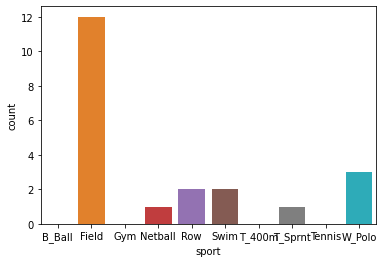

In [87]:
#1
ais.iloc[[1]]
#2

ais.iloc[4:7]
#3
ais.iloc[: ,4:7]
#4
ais.columns[7]
#5
ais.query("(sport == 'Netball')")

ais[ais.sport == 'Netball'].wt

#from the ais dataframe, give the sports where 'BMI' > 26#
ais[ais.bmi > 26]
newais = ais[ais.bmi > 26]

sns.countplot(x = newais.sport, data = newais)


